Libreries :-

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import tree

setting the datafile

In [44]:
pd.set_option("display.max_columns" , 10)
df_original =pd.read_csv("titanic.csv")

In [45]:
df_original

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,...,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,...,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,...,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,...,0,111369,30.0000,C148,C


lets seperate columns to datas and target

In [46]:
df_target =df_original.Survived
df_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Lets drop unnececery columns which is not afffecti ng to data

In [47]:
df_data =df_original.drop(["PassengerId" , "Survived" , "Name" , "Parch" , "Ticket", "Cabin" , "Embarked" , "SibSp"] , axis ="columns")
df_data

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


converting the sex column in to numaric type

In [48]:
Le_Sex = LabelEncoder()
#inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})
df_data["Le_Sex"] = Le_Sex.fit_transform(df_data["Sex"])
df_data =df_data.drop(["Sex"],axis ="columns" )
df_data

,Pclass,Age,Fare,Le_Sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [49]:
df_data.isnull()

,Pclass,Age,Fare,Le_Sex
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
886,False,False,False,False
887,False,False,False,False
888,False,True,False,False
889,False,False,False,False


In [50]:
df_data.Age = df_data.Age.fillna(df_data.Age.mean())
df_data.isnull()

,Pclass,Age,Fare,Le_Sex
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
886,False,False,False,False
887,False,False,False,False
888,False,False,False,False
889,False,False,False,False


Lets train the model

In [51]:
X_train, X_test, Y_train , Y_test =train_test_split(df_data, df_target, test_size=0.2)
model =tree.DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [52]:
y_predict =model.predict(X_test)

Accuracy 

In [53]:
model.score(X_test , Y_test)

0.7318435754189944

Lets get the deference between predict and real values

[[85 23]
 [25 46]]


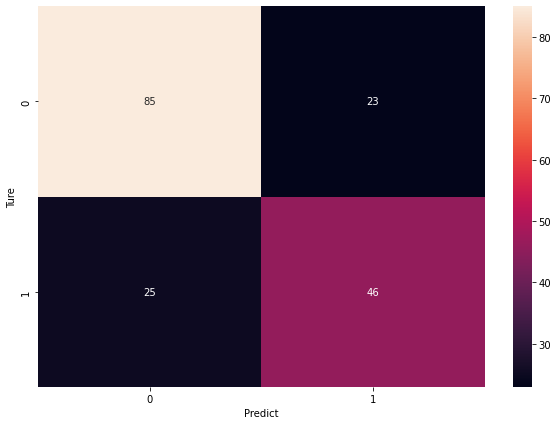

In [54]:
cm =confusion_matrix(Y_test ,y_predict)
print(cm)
plt.figure(figsize =(10,7))
sb.heatmap(cm, annot =True)
plt.xlabel("Predict")
plt.ylabel("Ture")
plt.show()